# Database Filtering

In this section, we illustrate how to filter the pseudoPAGES2k dataset in various ways with `cfr`.

Required data to complete this tutorial:

- pseudoPAGES2k: [ppwn_SNRinf_rta.nc](https://github.com/fzhu2e/paper-pseudoPAGES2k/raw/main/data/ppwn_SNRinf_rta.nc)

In [1]:
%load_ext autoreload
%autoreload 2

import cfr

## Load the pseudoPAEGS2k dataset

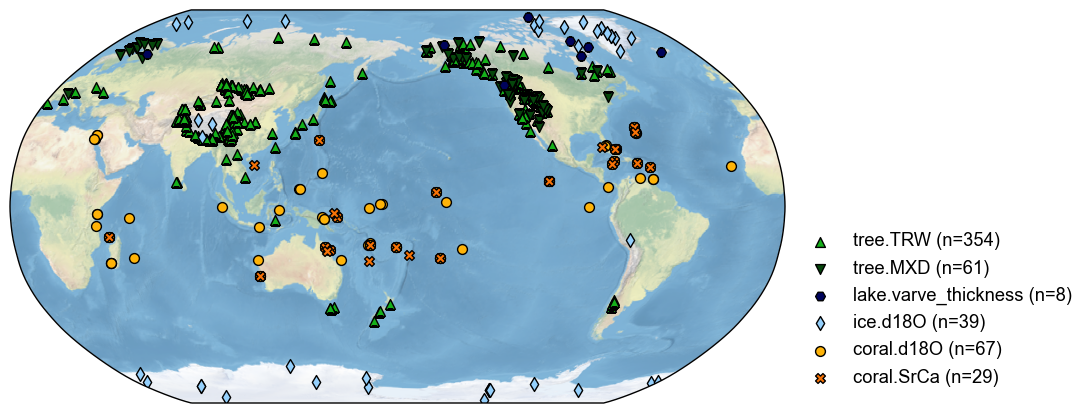

In [2]:
# load the pseudoPAGES2k database from a netCDF file
pdb = cfr.ProxyDatabase().load_nc('./data/ppwn_SNRinf_rta.nc')

# plot to have a check
fig, ax = pdb.plot()

## Filter the pseudoPAGES2k dataset

The `cfr.ProxyDatabase` class comes with a `.filter()` method that can help us filter the database in various ways.

### By proxy types

The most common way to filter a proxy database is by the proxy types.
For instance, to get a subset of the database for TRW records:

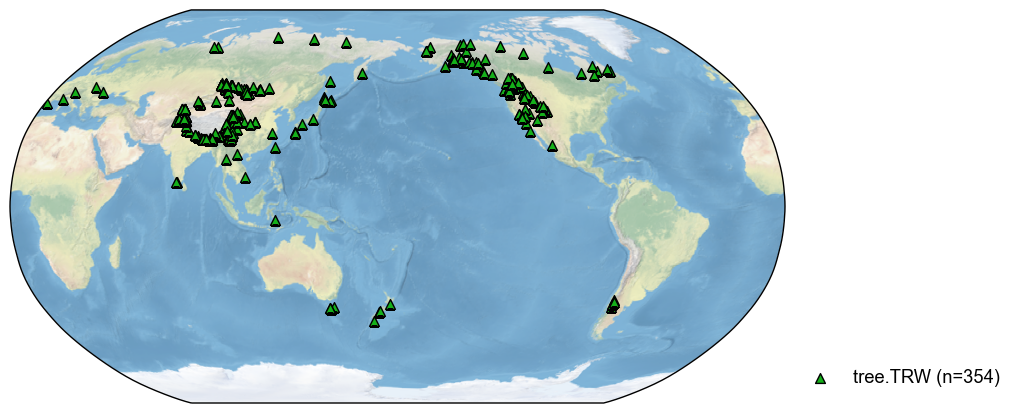

In [3]:
pdb_trw = pdb.filter(by='ptype', keys='tree.TRW')
fig, ax =  pdb_trw.plot()

The method supports **fuzzy search**, so the below works as well:

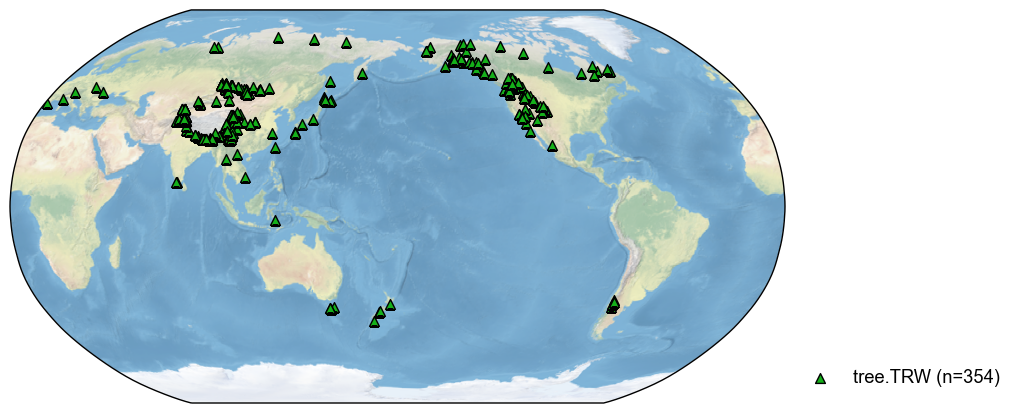

In [4]:
pdb_trw = pdb.filter(by='ptype', keys='RW')
fig, ax =  pdb_trw.plot()

With this feature, we may search multiple types:

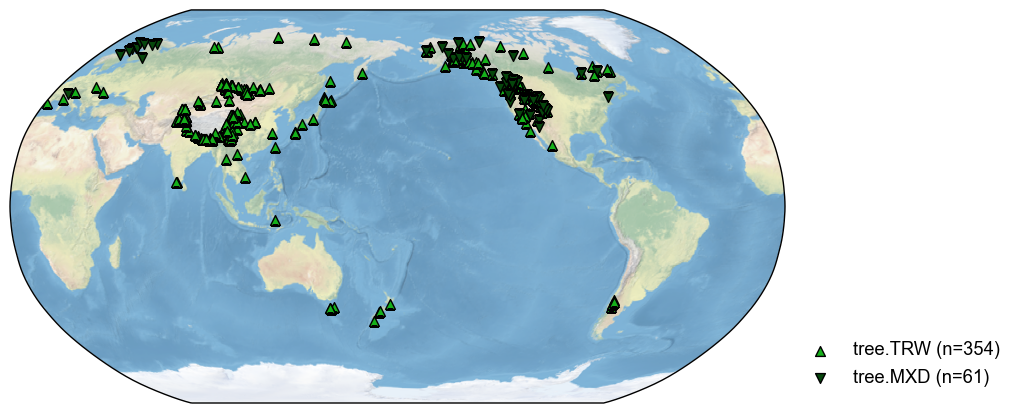

In [5]:
pdb_tree = pdb.filter(by='ptype', keys='tree')
fig, ax =  pdb_tree.plot()

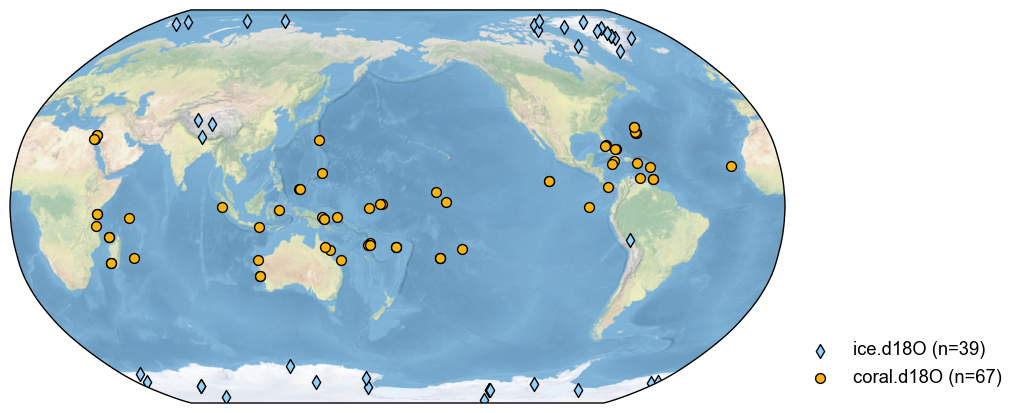

In [6]:
pdb_d18O = pdb.filter(by='ptype', keys='d18O')
fig, ax =  pdb_d18O.plot()

To search arbitrary multiple types, simply use a list of the keys:

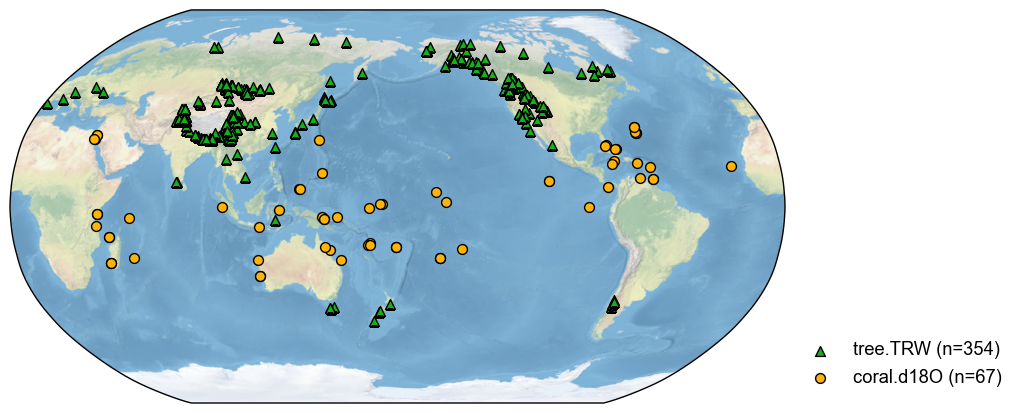

In [7]:
pdb_mix = pdb.filter(by='ptype', keys=['tree.TRW', 'coral.d18O'])
fig, ax =  pdb_mix.plot()

### By proxy IDs

In some cases, we would like to get a subset of the database consisting of certain records that we know the IDs ahead.
For instance, we may list several proxy IDs (`pid`):

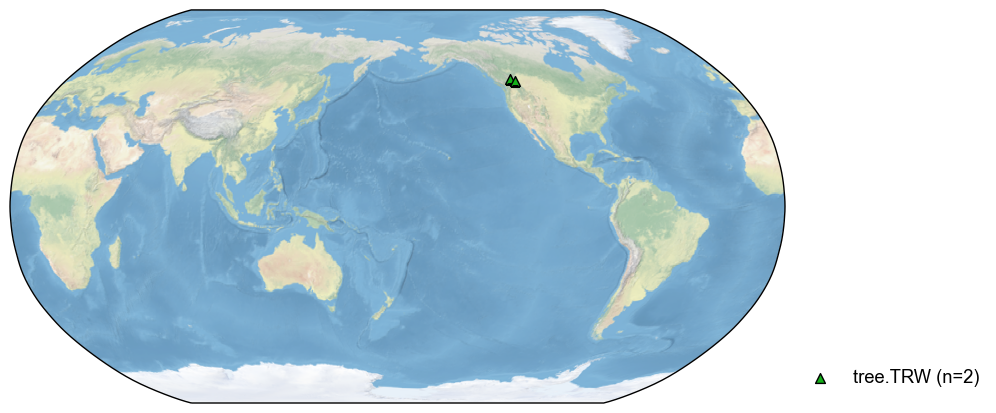

In [8]:
pdb_sub = pdb.filter(by='pid', keys=['NAm_153', 'NAm_154'])
fig, ax = pdb_sub.plot()

With the **fuzzy search** feature, we may get a subset of all the North America sites:

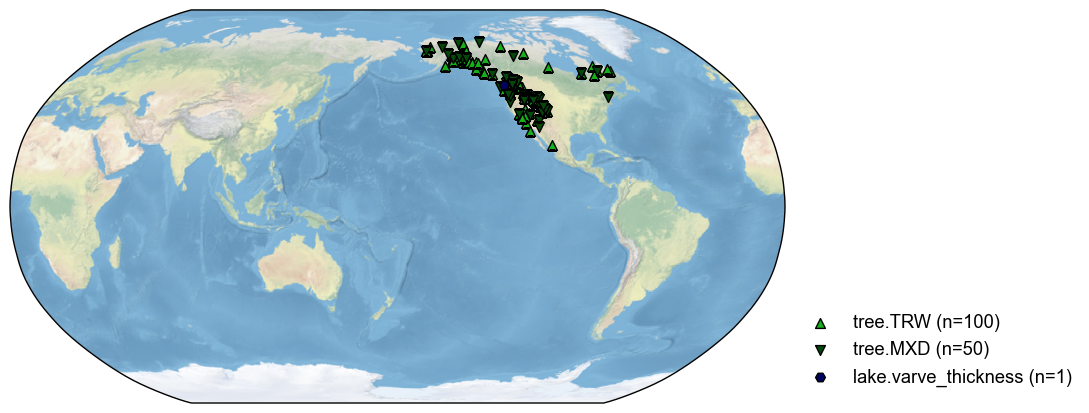

In [9]:
pdb_NAm = pdb.filter(by='pid', keys='NAm')
fig, ax = pdb_NAm.plot()

### By a latitude range

Sometimes, we only need to use the records within a latitude range.
For instance, the tropical records:

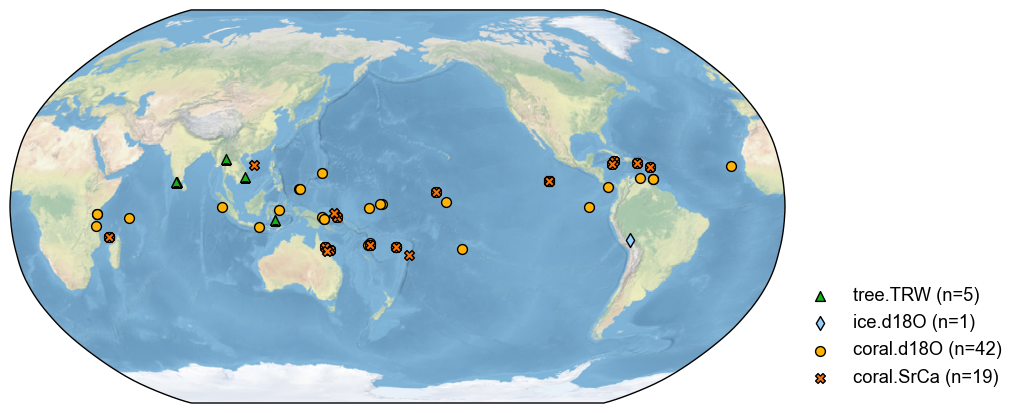

In [10]:
pdb_lat = pdb.filter(by='lat', keys=[-20, 20])
fig, ax = pdb_lat.plot()

### By a longitude range

Similarly, we may filter the database by a longitude range.
For instance:

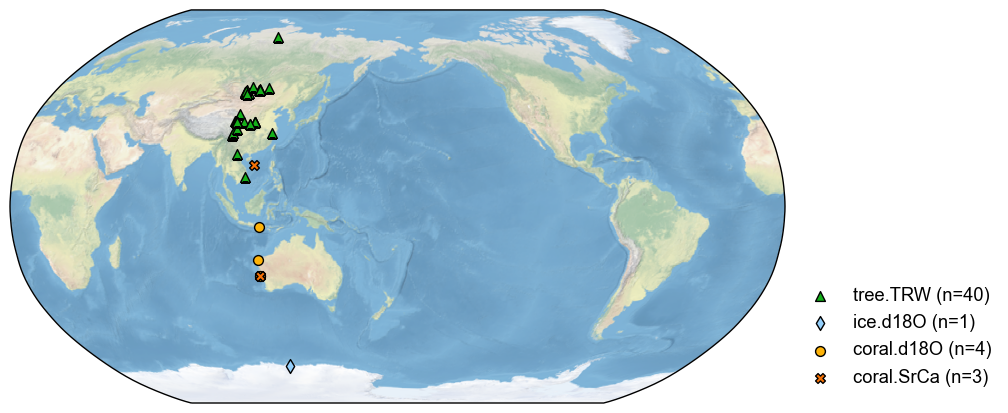

In [11]:
pdb_lon = pdb.filter(by='lon', keys=[100, 120])
fig, ax = pdb_lon.plot()

### By a square (latitude + longitude ranges)

We may also filter the database by a square specified by the min & max of the lat & lon.
In this case, the argument `keys` represents a list `[lat_min, lat_max, lon_min, lon_max]`.
For instance:

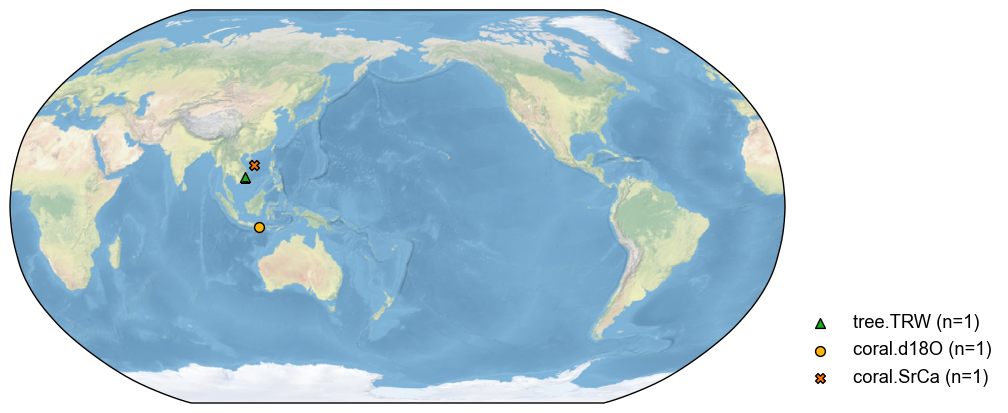

In [12]:
pdb_square = pdb.filter(by='loc-square', keys=[-20, 20, 100, 120])
fig, ax = pdb_square.plot()

### By a circle (center + distance)

Sometimes, we would like to search for the records around a center location.
In this case, the argument `keys` represents a list `[lat, lon, distance]`.
For instance:

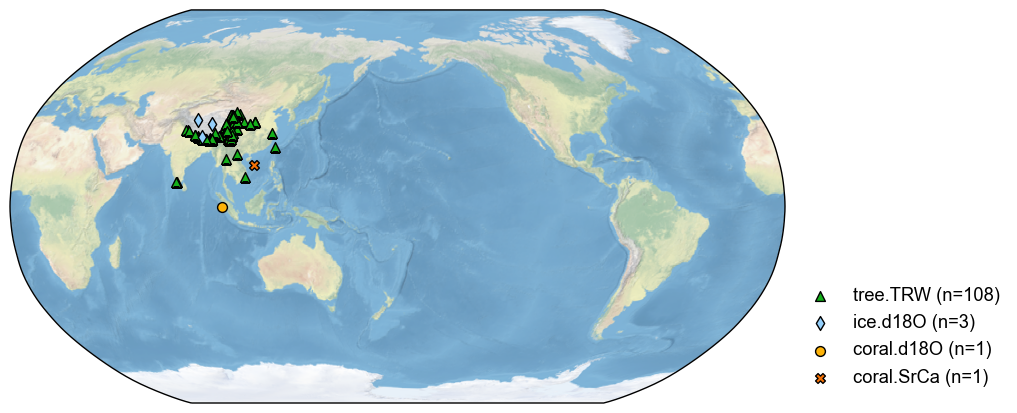

In [13]:
pdb_circle = pdb.filter(by='loc-circle', keys=[15, 100, 3000])
fig, ax = pdb_circle.plot()